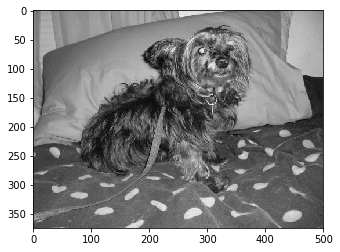

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "E:/datasets/PetImages/"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to cats or dogs
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [2]:
print(img_array) #this is how our data looks like

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


In [3]:
print(img_array.shape)

(375, 500)


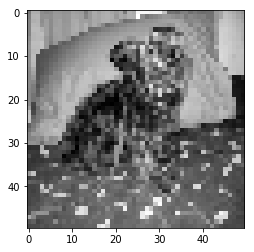

In [4]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #making every image in the same size
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [ ]:
#creating traing dataset

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to cats or dogs
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [7]:
print(len(training_data))

24946


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]: 
    print(sample[1])# o for dog 1 for cat

1
1
1
0
1
0
1
1
1
1


In [20]:
X = []
y = []

In [21]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # 1 is for grayscale /3 should be there for rgb

In [22]:
import pickle

pickle_out = open("X.pickle", "wb") # saving data
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle", "rb") #reading data using pickle
X = pickle.load(pickle_in)

In [23]:
X[1]

array([[[ 80],
        [112],
        [135],
        ..., 
        [220],
        [228],
        [230]],

       [[ 69],
        [121],
        [142],
        ..., 
        [223],
        [231],
        [237]],

       [[ 68],
        [128],
        [144],
        ..., 
        [226],
        [236],
        [236]],

       ..., 
       [[137],
        [125],
        [138],
        ..., 
        [127],
        [117],
        [117]],

       [[130],
        [144],
        [125],
        ..., 
        [136],
        [113],
        [128]],

       [[126],
        [136],
        [136],
        ..., 
        [119],
        [109],
        [118]]], dtype=uint8)